# SmartBeds - MDS: Análisis

## Grado en Ingeniería Informática
## Universidad de Burgos
##### José Luis Garrido Labrador

In [83]:
%matplotlib inline 
#para dibujar en el propio notebook
import pandas as pd # se importa pandas como pd
import numpy as np  #numpy como np
import matplotlib.pyplot as plt #%matplotlilib.pyplot como plt
import mpl_toolkits.mplot3d #Matplotlib 3d
import pickle as pk #Pikcle as pk
import gc #Garbage colector

### Carga

Text(0.5, 1.0, 'MDS Raw - Hours around seizures')

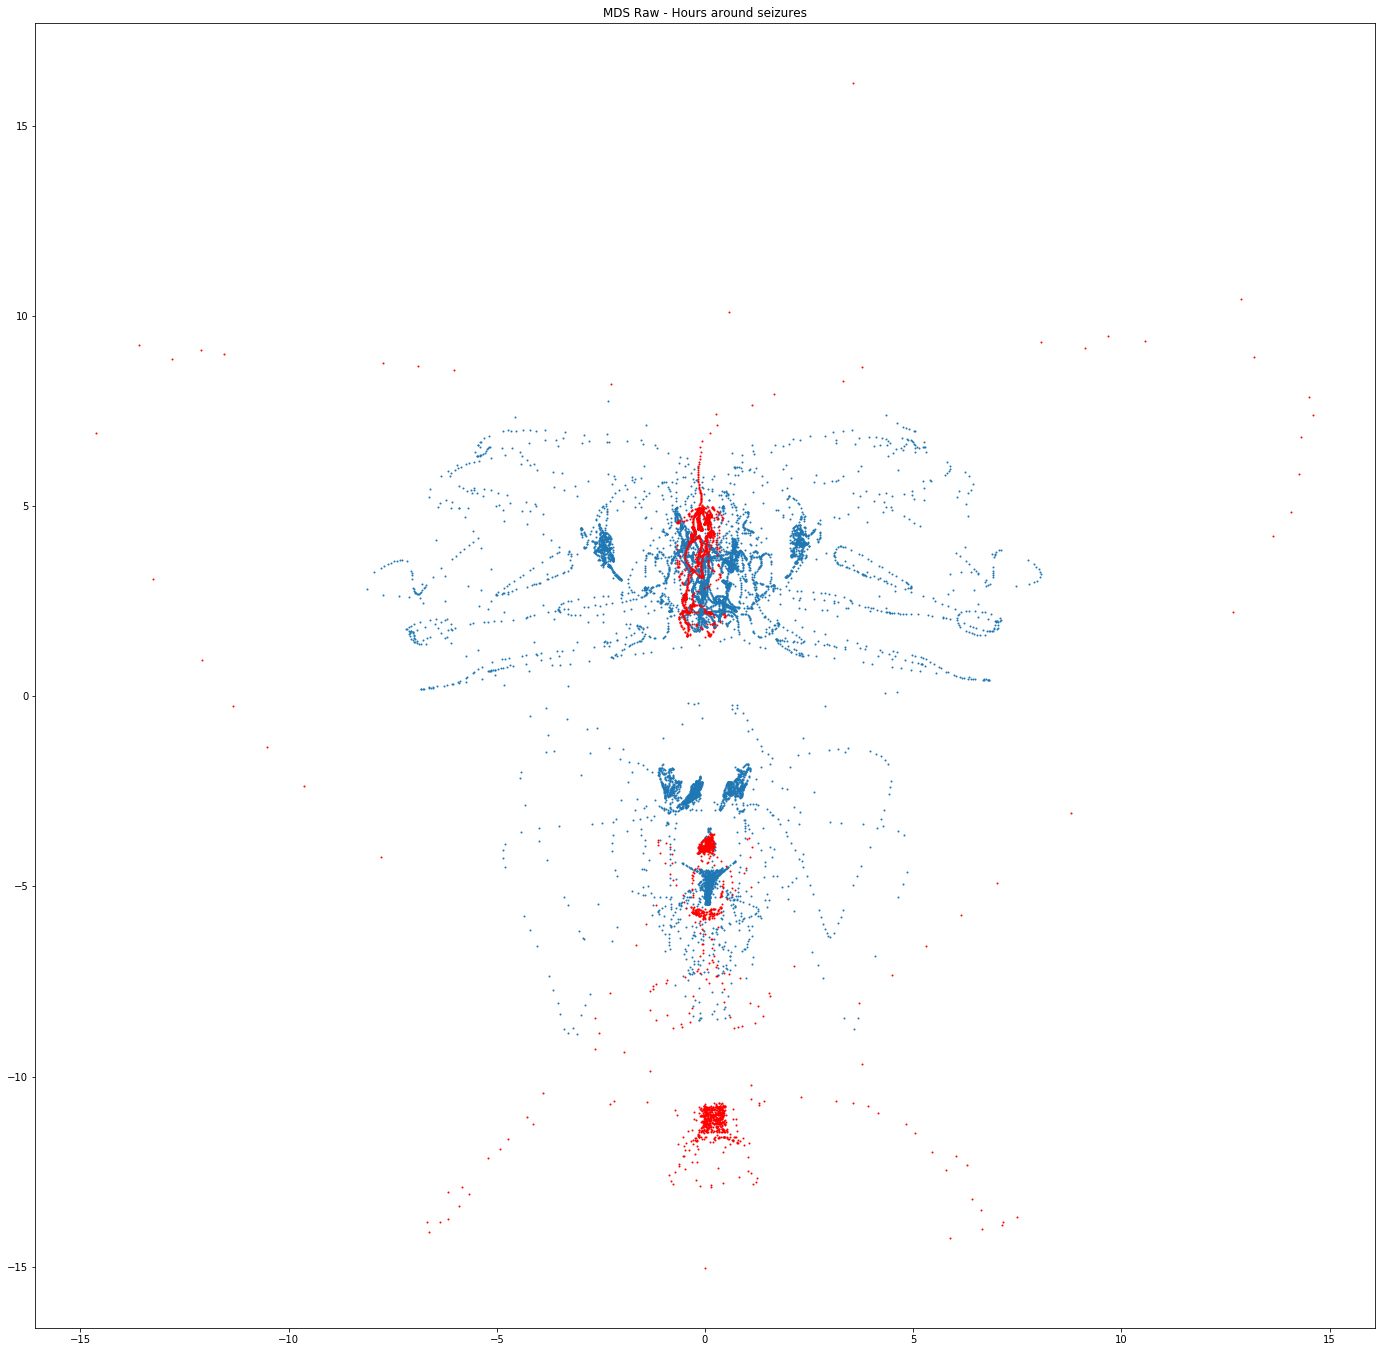

In [84]:
with open('../data/MDS-raw-100.npy','rb') as f:
    mdsB = pk.load(f)
with open('../data/datosHour.pdd','rb') as f:
    datosPartHour = pk.load(f)

plt.figure(figsize=(24,24))
mdsSample = mdsB

target = datosPartHour['target'].values
notTarget = np.logical_not(target)

serie = pd.DataFrame(mdsSample)

X = pd.Series(serie[0]).loc[notTarget]
Y = pd.Series(serie[1]).loc[notTarget]

X_t = pd.Series(serie[0]).loc[target]
Y_t = pd.Series(serie[1]).loc[target]

plt.scatter(X,Y,s=1)
plt.scatter(X_t,Y_t,s=1,c='r')
plt.title('MDS Raw - Hours around seizures')

### Estudio de las tres zonas
Se dividen los datos en tres zonas visibles, la superior para **y** mayor de 0, la intermedia para **y** entre -10 y 0 y la inferior para **y** menor de -10

In [85]:
sup = mdsB[mdsB[:,1]>0]
supPD = datosPartHour[mdsB[:,1]>0]
med = mdsB[(-10<mdsB[:,1]) & (mdsB[:,1]<=0)]
medPD = datosPartHour[(-10<mdsB[:,1]) & (mdsB[:,1]<=0)]
inf = mdsB[mdsB[:,1]<=-10]
infPD = datosPartHour[mdsB[:,1]<=-10]

In [86]:
MIN5 = 300 #Segundos de 5 minutos
# Horas de inicio y final de cada crisis
inicio = None
final  = None

#Cálculo del comienzo y del final
b = False
for index,row in datosPartHour.iterrows():
    if not b and row['target']:
        inicio = row['DateTime']
    elif b and not row['target']:
        final = row['DateTime']-pd.to_timedelta(1,unit='s') #Segundo anterior
    b = row['target']

assert not(inicio is None) and not(final is None), 'No hay inicio o final'

inicio_5 = inicio+pd.to_timedelta(MIN5,unit='s')
final_5 = final-pd.to_timedelta(MIN5,unit='s')
inicio, inicio_5, final_5, final

(Timestamp('2018-11-10 03:30:00'),
 Timestamp('2018-11-10 03:35:00'),
 Timestamp('2018-11-10 03:45:00'),
 Timestamp('2018-11-10 03:50:00'))

In [97]:
def dibujado(rows,data,title=''):
    global inicio, inicio_5, final_5, final
    
    plt.figure(figsize=(16,16))
    
    antes = rows[data['DateTime'].map(lambda x: x < inicio)]
    despues = rows[data['DateTime'].map(lambda x: x > final)]
    first5 = rows[(data['DateTime'].map(lambda x: x >= inicio)) & (data['DateTime'].map(lambda x: x <= inicio_5))]
    last5 = rows[(data['DateTime'].map(lambda x: x >= final_5)) & (data['DateTime'].map(lambda x: x <= final))]
    med = rows[(data['DateTime'].map(lambda x: x > inicio_5)) & (data['DateTime'].map(lambda x: x < final_5))]
    
    colors = ['b','k','g','r','orange']
    states = [antes, despues, first5, med, last5]
    pos = ['Antes','Después','Primeros 5 minutos','Minutos intermedios','Últimos 5 minutos']
    
    for i in range(len(states)):
        X = states[i][:,0]
        Y = states[i][:,1]
        plt.scatter(X,Y,c=colors[i],s=1)
    plt.title(title)
    
    plt.legend(tuple(pos), loc='best')

    
    print('Ha habido:')
    for i in range(len(states)):
        print("\t"+str(len(states[i]))+" casos "+pos[i])

## Parte Superior

Notación de colores: 
* Azul: Antes de la crisis
* Negro: Después de la crisis
* Verde: Primeros 5 minutos de la crisis
* Rojos: Intermedio de la crisis
* Naranja: Ultimos 5 minutos de la crisis

Ha habido:
	1055 casos Antes
	4498 casos Después
	0 casos Primeros 5 minutos
	681 casos Minutos intermedios
	753 casos Últimos 5 minutos


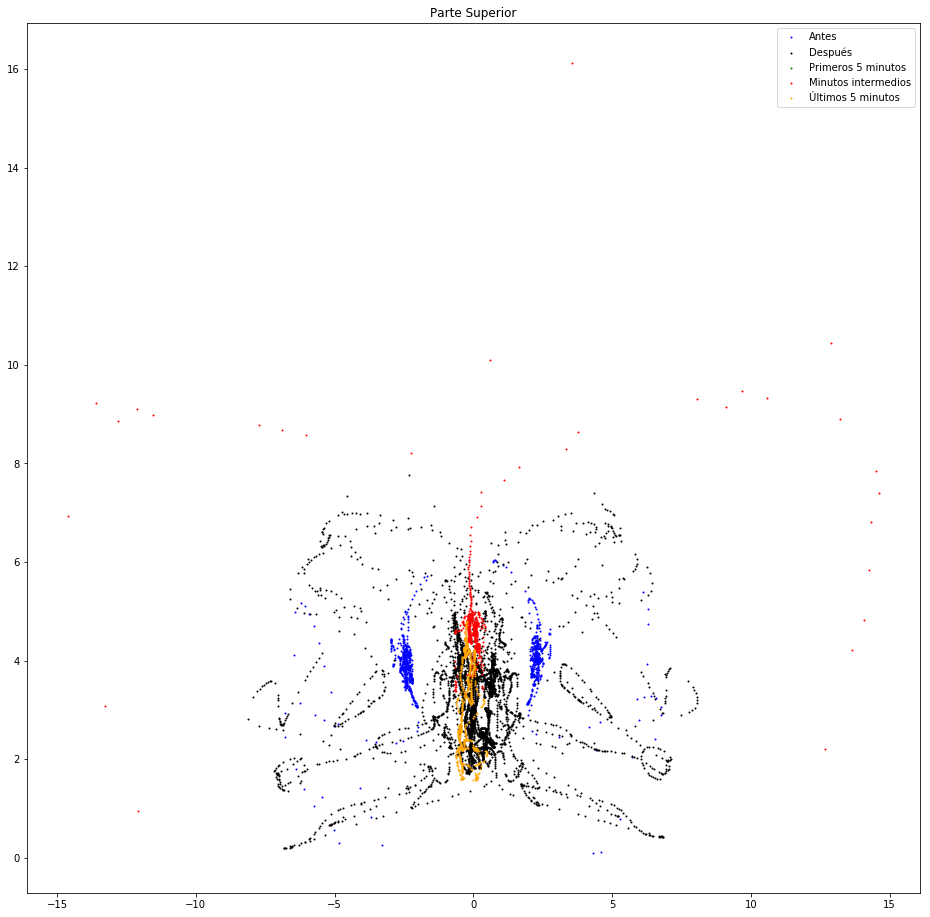

In [98]:
dibujado(sup,supPD,'Parte Superior')

## Parte Intermedia

Notación de colores: 
* Azul: Antes de la crisis
* Negro: Después de la crisis
* Verde: Primeros 5 minutos de la crisis
* Rojos: Intermedio de la crisis
* Naranja: Ultimos 5 minutos de la crisis

Ha habido:
	3444 casos Antes
	0 casos Después
	752 casos Primeros 5 minutos
	189 casos Minutos intermedios
	0 casos Últimos 5 minutos


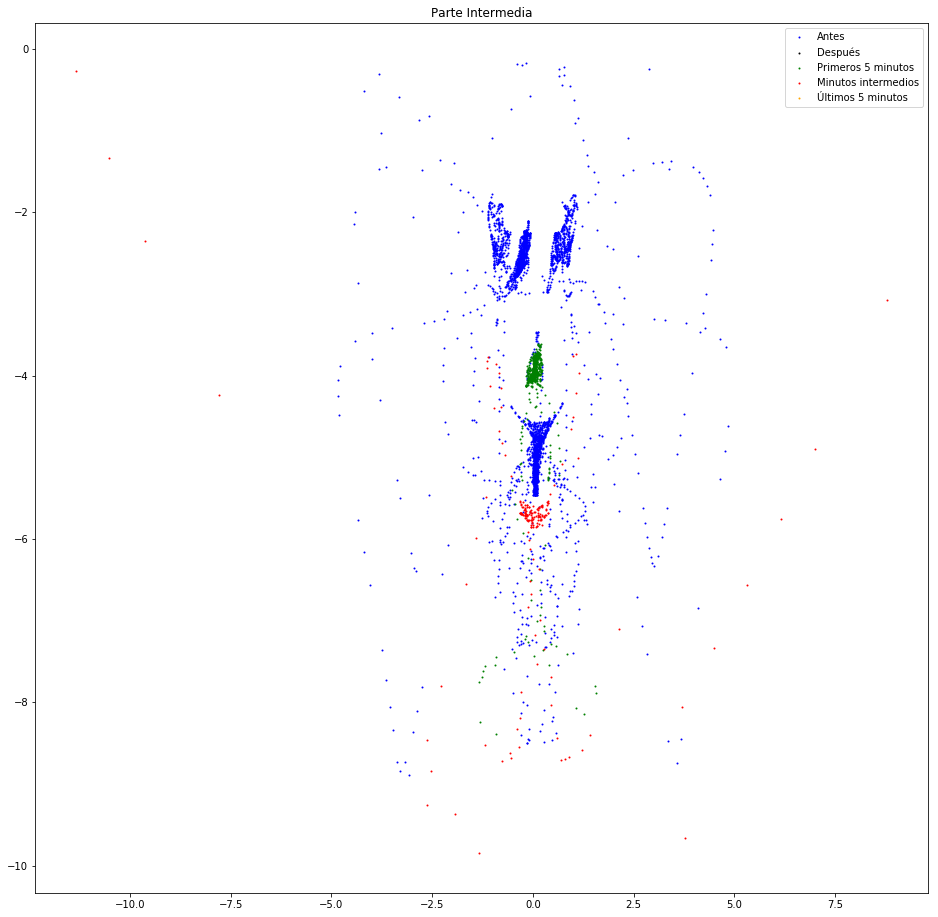

In [99]:
dibujado(med,medPD,'Parte Intermedia')

## Parte Inferior

Notación de colores: 
* Azul: Antes de la crisis
* Negro: Después de la crisis
* Verde: Primeros 5 minutos de la crisis
* Rojos: Intermedio de la crisis
* Naranja: Ultimos 5 minutos de la crisis

Ha habido:
	0 casos Antes
	0 casos Después
	0 casos Primeros 5 minutos
	627 casos Minutos intermedios
	0 casos Últimos 5 minutos


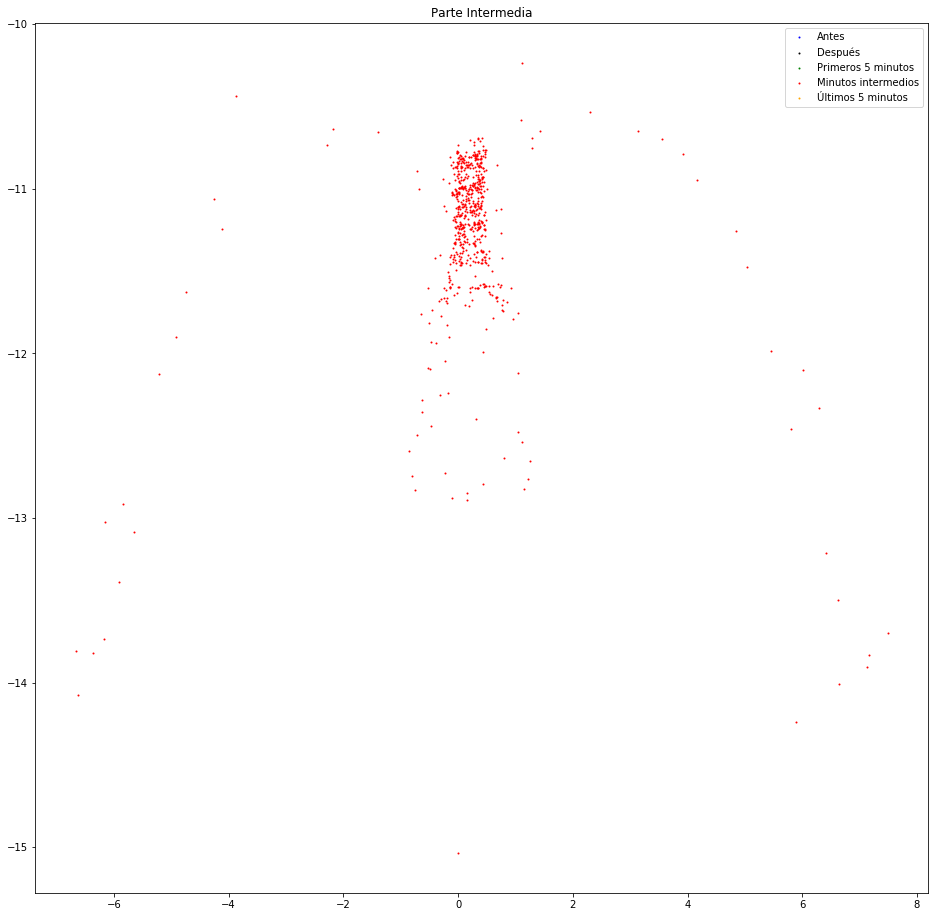

In [100]:
dibujado(inf,infPD,'Parte Intermedia')

### Todo

Ha habido:
	4499 casos Antes
	4498 casos Después
	752 casos Primeros 5 minutos
	1497 casos Minutos intermedios
	753 casos Últimos 5 minutos


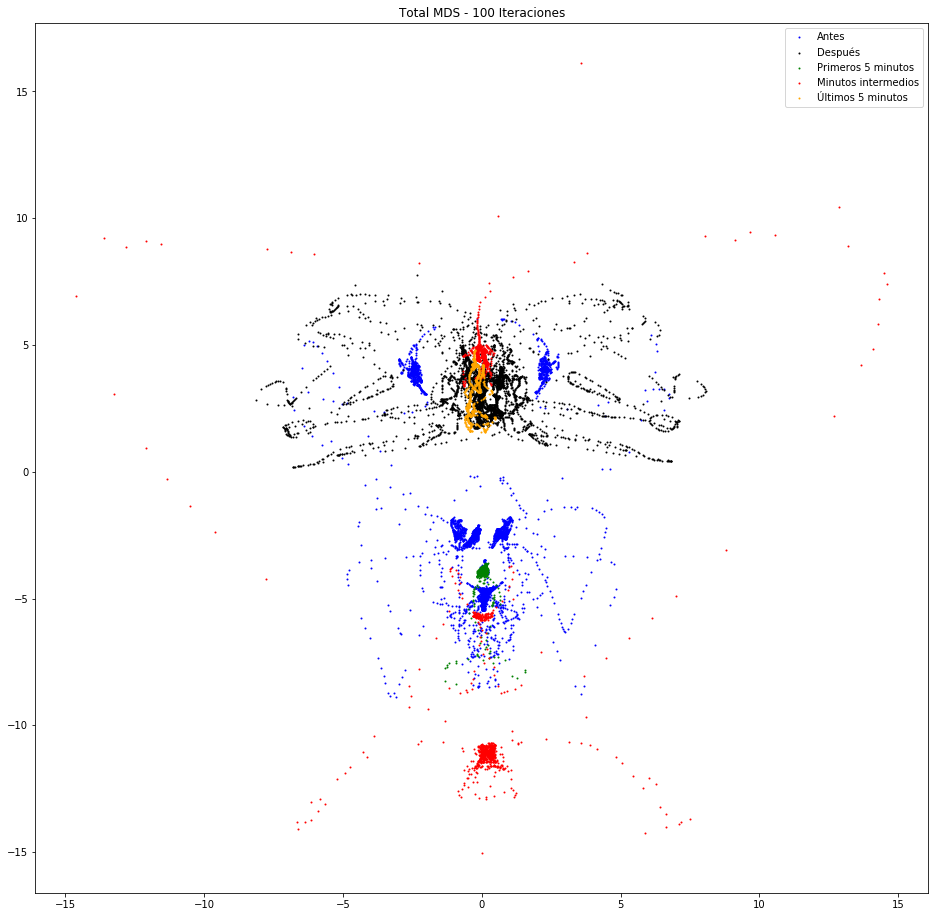

In [102]:
dibujado(mdsB,datosPartHour,'Total MDS - 100 Iteraciones')